https://docs.google.com/document/d/11fQslM3EQ16nDm9S_ztp90IlAAfPOpdNPAY-WRJ8hHU/

edit
Author: 
Shuyao Wang, Qingyuan Li 

In this project, we need to find out is wearing mask prevent the spred of Covid-19. 

CDC COVID Data Tracker: 
https://covid.cdc.gov/covid-data-tracker/

COVID-19 CORONAVIRUS PANDEMIC: 
https://www.worldometers.info/coronavirus/


TA推荐的找data的网站
https://www.kaggle.com/sudalairajkumar/covid19-in-usa?select=us_states_covid19_daily.csv





At first, we need to extrac data from several sources to prepare the data analysis later. 

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import html5lib
import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
import seaborn
import statsmodels.api as sm
from numpy import NaN

In [341]:
# upload us_covid19_daily.csv
from google.colab import files
uploaded1 = files.upload()

Saving us_covid19_daily.csv to us_covid19_daily (2).csv


In [342]:
# process the covid19 daily csv 
import pandas as pd 
import io 
  
daily_table = pd.read_csv(io.BytesIO(uploaded1['us_covid19_daily.csv'])) 
daily_table.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dateChecked,death,hospitalized,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20201206,56,14534035,161986294,13592.0,101487.0,585676.0,20145.0,31946.0,7094.0,3322.0,5624444.0,2020-12-06T24:00:00Z,273374.0,585676.0,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
1,20201205,56,14357264,160813704,13433.0,101190.0,583420.0,19950.0,31831.0,7005.0,3321.0,5576026.0,2020-12-05T24:00:00Z,272236.0,583420.0,202429337,2020-12-05T24:00:00Z,0,0,2445,3316,1526995,211073,2169756,6249216c5f097c94ce33a811dab011a483a42404
2,20201204,56,14146191,159286709,12714.0,101276.0,580104.0,19858.0,31608.0,6999.0,3305.0,5470389.0,2020-12-04T24:00:00Z,269791.0,580104.0,200259581,2020-12-04T24:00:00Z,0,0,2563,4652,1260657,224831,1854869,ae30ea088584335ba4d57ee927f8dbda6add74db
3,20201203,56,13921360,158026052,15106.0,100755.0,575452.0,19723.0,31276.0,6867.0,3280.0,5404018.0,2020-12-03T24:00:00Z,267228.0,575452.0,198404712,2020-12-03T24:00:00Z,0,0,2706,5331,1238465,210204,1828230,0f253d185ecb336cdd18a4c61996eda1b7eef13b
4,20201202,56,13711156,156787587,14368.0,100322.0,570121.0,19680.0,31038.0,6855.0,3252.0,5322128.0,2020-12-02T24:00:00Z,264522.0,570121.0,196576482,2020-12-02T24:00:00Z,0,0,2733,5028,982032,195796,1459202,477c17b6302d0485195e77ecf8270a974f7a3c82


In [343]:
daily = daily_table.copy()
daily.drop(['hash','lastModified','total','posNeg','pending','hospitalizedCurrently','hospitalizedCumulative','inIcuCurrently','inIcuCumulative','onVentilatorCurrently','onVentilatorCumulative','dateChecked'], axis = 1, inplace = True)
daily['month'] = daily['date'].astype(str).str[4:6]
daily['date'] = daily['date'].astype(str).str[0:4] + '-' + daily['date'].astype(str).str[4:6]+ '-'+ daily['date'].astype(str).str[6:8]
daily

,date,states,positive,negative,recovered,death,hospitalized,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,month
0,2020-12-06,56,14534035,161986294,5624444.0,273374.0,585676.0,204063869,1138,2256,1172590,176771,1634532,12
1,2020-12-05,56,14357264,160813704,5576026.0,272236.0,583420.0,202429337,2445,3316,1526995,211073,2169756,12
2,2020-12-04,56,14146191,159286709,5470389.0,269791.0,580104.0,200259581,2563,4652,1260657,224831,1854869,12
3,2020-12-03,56,13921360,158026052,5404018.0,267228.0,575452.0,198404712,2706,5331,1238465,210204,1828230,12
4,2020-12-02,56,13711156,156787587,5322128.0,264522.0,570121.0,196576482,2733,5028,982032,195796,1459202,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2020-01-26,2,0,0,NaN,NaN,NaN,2,0,0,0,0,0,01
316,2020-01-25,2,0,0,NaN,NaN,NaN,2,0,0,0,0,0,01
317,2020-01-24,2,0,0,NaN,NaN,NaN,2,0,0,0,0,0,01
318,2020-01-23,2,0,0,NaN,NaN,NaN,2,0,0,0,0,1,01


In [344]:
row1 = daily.loc[daily['date'].astype(str).str.contains('30')].copy()
row2 = daily.loc[daily['date'].astype(str).str.contains('12-06')].copy()
row3 = daily.loc[daily['date'].astype(str).str.contains('2-28')].copy()
row = row1.append(row2)
row = row.append(row3)
row = row.sort_values('month', ascending = True)
row['positiveIncrease'] = row.positive.diff()
row['deathIncrease'] = row.death.diff()
row['negativeIncrease'] = row.negative.diff()
row['totalTestResultsIncrease'] = row.totalTestResults.diff()
row['hospitalizedIncrease'] = row.hospitalized.diff()
row

,date,states,positive,negative,recovered,death,hospitalized,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,month
311,2020-01-30,3,0,0,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,01
282,2020-02-28,7,0,0,NaN,4.0,NaN,6490,NaN,NaN,0.0,0.0,6485.0,02
251,2020-03-30,56,172740,818231,4560.0,3425.0,19798.0,1035705,3421.0,NaN,818231.0,172740.0,1029215.0,03
220,2020-04-30,56,1073745,5263080,154587.0,59599.0,122505.0,6543127,56174.0,102707.0,4444849.0,901005.0,5507422.0,04
190,2020-05-30,56,1769819,14941329,494308.0,99865.0,206949.0,17312676,40266.0,84444.0,9678249.0,696074.0,10769549.0,05
159,2020-06-30,56,2623989,29829805,813219.0,120087.0,239770.0,33841528,20222.0,32821.0,14888476.0,854170.0,16528852.0,06
129,2020-07-30,56,4454538,50311353,1413102.0,144053.0,300348.0,58102601,23966.0,60578.0,20481548.0,1830549.0,24261073.0,07
98,2020-08-30,56,5943743,71109595,2152344.0,175274.0,363298.0,83299643,31221.0,62950.0,20798242.0,1489205.0,25197042.0,08
67,2020-09-30,56,7165483,92959838,2838664.0,198993.0,401494.0,110928031,23719.0,38196.0,21850243.0,1221740.0,27628388.0,09
37,2020-10-30,56,8958126,119043563,3576201.0,221496.0,465114.0,144951353,22503.0,63620.0,26083725.0,1792643.0,34023322.0,10


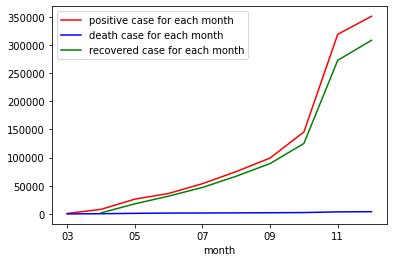

In [392]:
ax = row.plot('month', 'positive', kind='line', c='r', label='positive case for each month')
row.plot('month', 'death', kind='line', c='b', ax = ax, label='death case for each month')
row.plot('month', 'recovered', kind='line', c='g', ax = ax, label='recovered case for each month')

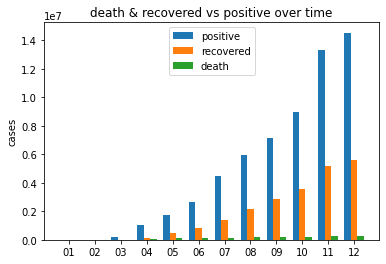

In [347]:
labels = row['month']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-0.25, row['positive'], width, label='positive')
rects2 = ax.bar(x, row['recovered'], width, label='recovered')
rects3 = ax.bar(x+0.25, row['death'], width, label='death')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('cases')
ax.set_title('death & recovered vs positive over time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

This graph shows there the total positive case are increase overtime and it's growth rate is highest in month 10-11, and then became slower, growth exp


regression for positive case is :  
1.613e+06 x - 1.255e+06
regression for death is :  
2.851e+04 x + 2.727e+04
regression for recovered is :  
6.53e+05 x - 7.168e+05


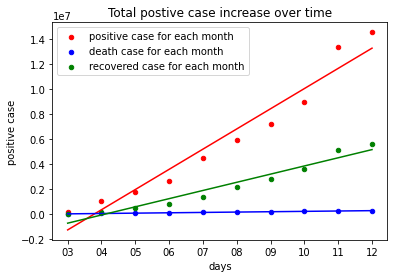

In [350]:
drop_NaN = row[2:]
x_axis = range(0, len(drop_NaN['positive'].tolist()))
y_axis = drop_NaN['positive'].tolist()

reg = np.polyfit(x = x_axis, y = y_axis, deg = 1)
ry = np.poly1d(reg)
yvals_positive = ry (x_axis)
print("regression for positive case is :", ry)


x_axis = range(0, len(drop_NaN['death'].tolist()))
y_axis = drop_NaN['death'].tolist()

reg = np.polyfit(x = x_axis, y = y_axis, deg = 1)
ry = np.poly1d(reg)
yvals_death = ry (x_axis)
print("regression for death is :", ry)

x_axis = range(0, len(drop_NaN['recovered'].tolist()))
y_axis = drop_NaN['recovered'].tolist()
reg = np.polyfit(x = x_axis, y = y_axis, deg = 1)
ry = np.poly1d(reg)
yvals_recovered = ry (x_axis)
print("regression for recovered is :", ry)


ax = drop_NaN.plot('month', 'positive', kind='scatter', c='r', label='positive case for each month')
drop_NaN.plot('month', 'death', kind='scatter', c='b', ax = ax, label='death case for each month')
drop_NaN.plot('month', 'recovered', kind='scatter', c='g', ax = ax, label='recovered case for each month')

ax.plot(drop_NaN['month'], yvals_positive,color='red')
ax.plot(drop_NaN['month'], yvals_death,color='blue')
ax.plot(drop_NaN['month'], yvals_recovered,color='green')


plt.title('Total postive case increase over time')
plt.xlabel('days')
plt.ylabel('positive case')
plt.show()

In [351]:
# According to cdc the symptom usually starts at the 5th day. 
# But consider the testing time, i would use 14 days. 
# Consider the date before Nov 25th for Thx giving holiday

#table before thx giving
daily['date'] = pd.to_datetime(daily['date'])
daily.sort_values(by=['date'], inplace=True)
thx_af = daily.loc[daily['date'] >= datetime.datetime(2020,11,25)]
thx_af = thx_af.loc[daily['date'] <= datetime.datetime(2020,11,25)+datetime.timedelta(days=14)]

#table after thx giving
thx_bf = daily.loc[daily['date'] < datetime.datetime(2020,11,25)]
thx_bf = thx_bf.loc[daily['date'] >= (datetime.datetime(2020,11,25)-datetime.timedelta(days=14))]
thx_af

,date,states,positive,negative,recovered,death,hospitalized,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,month
11,2020-11-25,56,12581196,148129101,4835956.0,253424.0,544898.0,184877012,2289,4568,1160187,183629,1720705,11
10,2020-11-26,56,12707531,148979519,4871312.0,254760.0,547145.0,186047207,1336,2247,850418,126335,1170195,11
9,2020-11-27,56,12901256,150483950,4947446.0,256132.0,550644.0,188173495,1372,3499,1504431,193725,2126288,11
8,2020-11-28,56,13055778,151760885,5024447.0,257377.0,554048.0,189883061,1245,3404,1276935,154522,1709566,11
7,2020-11-29,56,13191020,152644033,5065148.0,258180.0,556477.0,191173031,803,2429,883148,135242,1289970,11
6,2020-11-30,56,13338607,153863841,5146643.0,259316.0,559871.0,192776284,1136,3394,1219808,147587,1603253,11
5,2020-12-01,56,13515360,155805555,5226581.0,261789.0,565093.0,195117280,2473,5222,1941714,176753,2340996,12
4,2020-12-02,56,13711156,156787587,5322128.0,264522.0,570121.0,196576482,2733,5028,982032,195796,1459202,12
3,2020-12-03,56,13921360,158026052,5404018.0,267228.0,575452.0,198404712,2706,5331,1238465,210204,1828230,12
2,2020-12-04,56,14146191,159286709,5470389.0,269791.0,580104.0,200259581,2563,4652,1260657,224831,1854869,12


regression after thanks giving is :  
1.787e+05 x + 1.251e+07


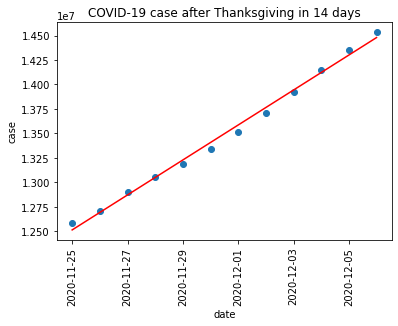

In [352]:
#
x_axis = np.arange(0, len(thx_af['positive'].tolist()))
y_axis = thx_af['positive'].tolist()

reg = np.polyfit(x = x_axis, y = y_axis, deg = 1)
ry = np.poly1d(reg)
yvals_af = ry (x_axis)
print("regression after thanks giving is :", ry)

plt.title("COVID-19 case after Thanksgiving in 14 days")
plt.xlabel("date")
plt.ylabel("case")
plt.xticks(rotation = 'vertical')
plt.scatter(thx_af['date'], y_axis)
plt.plot(thx_af['date'],yvals_af,color='red')



regression before thanks giving is :  
1.647e+05 x + 1.025e+07


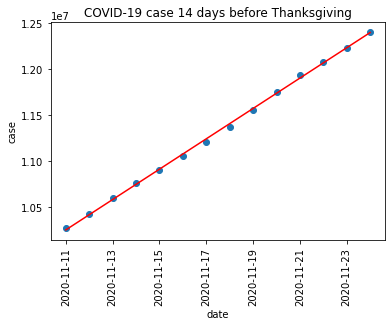

In [353]:
x_axis = range(0, len(thx_bf['positive'].tolist()))
y_axis = thx_bf['positive'].tolist()

reg = np.polyfit(x = x_axis, y = y_axis, deg = 1)
ry = np.poly1d(reg)
yvals_bf = ry (x_axis)
print("regression before thanks giving is :", ry)

plt.title("COVID-19 case 14 days before Thanksgiving")
plt.xlabel("date")
plt.ylabel("case")
plt.xticks(rotation = 'vertical')
plt.scatter(thx_bf['date'], y_axis)
plt.plot(thx_bf['date'],yvals_bf,color='red')



In [393]:
# upload us_covid19_daily.csv
from google.colab import files
uploaded2 = files.upload()

Saving us_states_covid19_daily.csv to us_states_covid19_daily (4).csv


In [ ]:
# process the STATES covid19 daily csv 
import pandas as pd 
import io 
  
state_table = pd.read_csv(io.BytesIO(uploaded2['us_states_covid19_daily.csv'])) 
state_table.head()

In [ ]:
state = state_table.copy()
state['month'] = state['date'].astype(str).str[4:6] 
state.drop(['hash','commercialScore','probableCases','negativeRegularScore','pending', 'hospitalizedCurrently','hospitalizedCumulative','inIcuCurrently','inIcuCumulative','onVentilatorCurrently',
            'onVentilatorCumulative','lastUpdateEt','dateModified','checkTimeEt','dateChecked','deathConfirmed','deathProbable','totalTestsViral','positiveTestsViral',
            'negativeTestsViral','positiveCasesViral','deathConfirmed','deathProbable','totalTestEncountersViral','totalTestsPeopleViral','totalTestsAntibody','positiveTestsAntibody',
            'negativeTestsAntibody','totalTestsPeopleAntibody','positiveTestsPeopleAntibody','negativeTestsPeopleAntibody','totalTestsPeopleAntigen','positiveTestsPeopleAntigen',
            'totalTestsAntigen','positiveTestsAntigen','fips','posNeg','negativeScore','positiveScore', 'score', 'grade'], axis = 1, inplace = True)
state['date'] = state['date'].astype(str).str[0:4] + '-' + state['date'].astype(str).str[4:6]+ '-'+ state['date'].astype(str).str[6:8] 
state['date'] = pd.to_datetime(state['date'])
state

In [ ]:
row1 = state.loc[state['date'].astype(str).str.contains('30')].copy()
row2 = state.loc[state['date'].astype(str).str.contains('12-06')].copy()
row3 = state.loc[state['date'].astype(str).str.contains('2-28')].copy()
row = row1.append(row2)
row = row.append(row3)
row = row.sort_values('month', ascending = True)
row['positiveIncrease'] = row.positive.diff()
row['deathIncrease'] = row.death.diff()
row['negativeIncrease'] = row.negative.diff()
row['totalTestResultsIncrease'] = row.totalTestResults.diff()
row['hospitalizedIncrease'] = row.hospitalized.diff()
row

In [ ]:
plot_case = row.pivot(index='state', columns='month', values='positive')
plot_case.plot.bar(stacked = True, figsize = (30, 20), fontsize = 10, width = 1 , xlabel = ("state"), ylabel = ('positive'))

In [ ]:
plot_case = row.pivot(index='state', columns='month', values='death')
plot_case.plot.bar(stacked = True, figsize = (30, 20), fontsize = 10, width = 1 , xlabel = ("state"), ylabel = ('death'))


In [ ]:
plot_case = row.pivot(index='state', columns='month', values='recovered')
plot_case.plot.bar(stacked = True, figsize = (30, 20), fontsize = 10, width = 1 , xlabel = ("state"), ylabel = ('recovered'))


马里兰


In [ ]:
MDcase = state.loc[state['state'].astype(str).str.contains('MD')].copy()
MDcase

In [ ]:
row1 = MDcase.loc[MDcase['date'].astype(str).str.contains('30')].copy()
row2 = MDcase.loc[MDcase['date'].astype(str).str.contains('12-06')].copy()
row3 = MDcase.loc[MDcase['date'].astype(str).str.contains('2-28')].copy()
row = row1.append(row2)
row = row.append(row3)
row = row.sort_values('month', ascending = True)
row['positiveIncrease'] = row.positive.diff()
row['deathIncrease'] = row.death.diff()
row['negativeIncrease'] = row.negative.diff()
row['totalTestResultsIncrease'] = row.totalTestResults.diff()
row['hospitalizedIncrease'] = row.hospitalized.diff()
row

In [ ]:

row['recoveredIncrease'] = row.recovered.diff()
labels = row['month']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 25))
rects1 = ax.bar(x-0.25, row['positiveIncrease'], width, label='positiveIncrease')
rects2 = ax.bar(x, row['recoveredIncrease'], width, label='recoveredIncrease')
rects3 = ax.bar(x+0.25, row['deathIncrease'], width, label='deathIncrease')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('increase ratio')
ax.set_title('death ratio & recovered ratio vs positive ratio over time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.axhline(row["positiveIncrease"].mean(), color="pink", linewidth=2, label='mean COVID-19 increase rate')
ax.axhline(row["deathIncrease"].mean(), color="purple", linewidth=2, label='mean death rate')
ax.axhline(row["recoveredIncrease"].mean(), color="red", linewidth=2, label='mean recovered rate')

In [ ]:
#The face covering policy of Maryland started on April 18th 
#https://governor.maryland.gov/wp-content/uploads/2020/04/Masks-and-Physical-Distancing-4.15.20.pdf

MDcase.sort_values(by=['date'], inplace=True)
mask_af = MDcase.loc[MDcase['date'] > datetime.datetime(2020,4,18)]
mask_af = mask_af.loc[MDcase['date'] <= (datetime.datetime(2020,4,18)+datetime.timedelta(days=14))]

mask_bf = MDcase.loc[MDcase['date'] < datetime.datetime(2020,4,18)]
mask_bf = mask_bf.loc[MDcase['date'] >= (datetime.datetime(2020,4,18)-datetime.timedelta(days=14))]




In [ ]:
x_axis = range(0, len(mask_bf['positive'].tolist()))
y_axis = mask_bf['positive'].tolist()

reg = np.polyfit(x = x_axis, y = y_axis, deg = 1)
ry = np.poly1d(reg)
yvals_bf = ry (x_axis)
print("regression before Governor's order is :", ry)

plt.title("COVID-19 case 14 days before Governor's order")
plt.xlabel("date")
plt.ylabel("case")
plt.xticks(rotation = 'vertical')
plt.scatter(mask_bf['date'], y_axis)
plt.plot(mask_bf['date'],yvals_bf,color='red')



In [ ]:
x_axis = range(0, len(mask_af['positive'].tolist()))
y_axis = mask_af['positive'].tolist()

reg = np.polyfit(x = x_axis, y = y_axis, deg = 1)
ry = np.poly1d(reg)
yvals_bf = ry (x_axis)
print("regression after Governor's order is :", ry)

plt.title("COVID-19 case 14 days after Govenor's order")
plt.xlabel("date")
plt.ylabel("case")
plt.xticks(rotation = 'vertical')
plt.scatter(mask_af['date'], y_axis)
plt.plot(mask_af['date'],yvals_bf,color='red')



明尼苏达

In [ ]:
MNcase = state.loc[state['state'].astype(str).str.contains('MN')].copy()
MNcase

In [368]:
row1 = MNcase.loc[MNcase['date'].astype(str).str.contains('30')].copy()
row2 = MNcase.loc[MNcase['date'].astype(str).str.contains('12-06')].copy()
row3 = MNcase.loc[MNcase['date'].astype(str).str.contains('2-28')].copy()
row = row1.append(row2)
row = row.append(row3)
row = row.sort_values('month', ascending = True)
row['positiveIncrease'] = row.positive.diff()
row['deathIncrease'] = row.death.diff()
row['negativeIncrease'] = row.negative.diff()
row['totalTestResultsIncrease'] = row.totalTestResults.diff()
row['hospitalizedIncrease'] = row.hospitalized.diff()
row

,date,state,positive,negative,totalTestResultsSource,totalTestResults,recovered,dataQualityGrade,death,hospitalized,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease,month
14081,2020-03-30,MN,823.0,19512.0,totalTestEncountersViral,20335.0,NaN,A,10.0,92.0,NaN,NaN,20335,NaN,NaN,NaN,03
12345,2020-04-30,MN,8116.0,73349.0,totalTestEncountersViral,81465.0,1829.0,A,343.0,1044.0,7293.0,53837.0,81465,61130.0,333.0,952.0,04
10665,2020-05-30,MN,26181.0,250392.0,totalTestEncountersViral,276573.0,17864.0,A,1036.0,3011.0,18065.0,177043.0,276573,195108.0,693.0,1967.0,05
8929,2020-06-30,MN,36303.0,569013.0,totalTestEncountersViral,605316.0,31601.0,A,1476.0,4054.0,10122.0,318621.0,605316,328743.0,440.0,1043.0,06
7249,2020-07-30,MN,53692.0,954190.0,totalTestEncountersViral,1007882.0,46965.0,A,1634.0,5112.0,17389.0,385177.0,1007882,402566.0,158.0,1058.0,07
5513,2020-08-30,MN,75189.0,1046882.0,totalTestEncountersViral,1478432.0,66916.0,A+,1865.0,6454.0,21497.0,92692.0,1122071,470550.0,231.0,1342.0,08
3777,2020-09-30,MN,99134.0,1315567.0,totalTestEncountersViral,2030167.0,89392.0,A,2089.0,7701.0,23945.0,268685.0,1414701,551735.0,224.0,1247.0,09
2097,2020-10-30,MN,145465.0,1691334.0,totalTestEncountersViral,2774695.0,125052.0,A,2437.0,10119.0,46331.0,375767.0,1836799,744528.0,348.0,2418.0,10
361,2020-11-30,MN,318763.0,2217580.0,totalTestEncountersViral,4156622.0,272608.0,A,3593.0,16791.0,173298.0,526246.0,2536343,1381927.0,1156.0,6672.0,11
25,2020-12-06,MN,350862.0,2301135.0,totalTestEncountersViral,4431677.0,308218.0,A,3984.0,18233.0,32099.0,83555.0,2651997,275055.0,391.0,1442.0,12


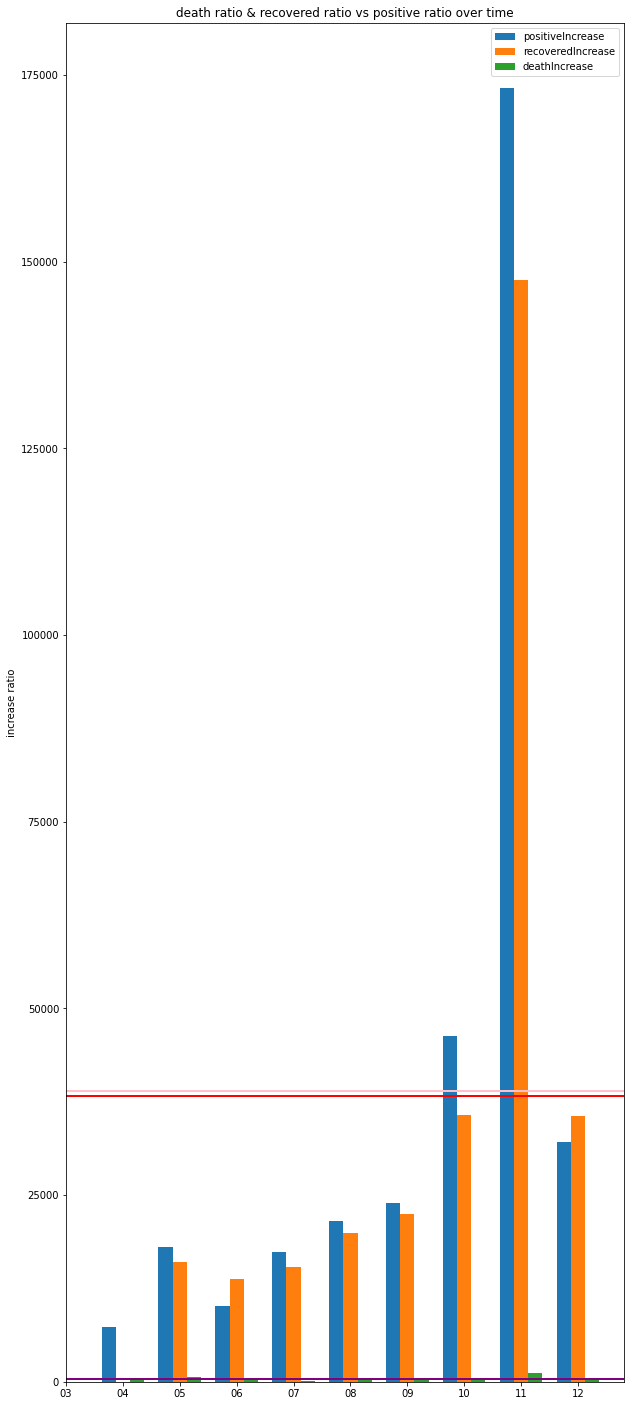

In [369]:
row['recoveredIncrease'] = row.recovered.diff()
labels = row['month']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 25))
rects1 = ax.bar(x-0.25, row['positiveIncrease'], width, label='positiveIncrease')
rects2 = ax.bar(x, row['recoveredIncrease'], width, label='recoveredIncrease')
rects3 = ax.bar(x+0.25, row['deathIncrease'], width, label='deathIncrease')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('increase ratio')
ax.set_title('death ratio & recovered ratio vs positive ratio over time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.axhline(row["positiveIncrease"].mean(), color="pink", linewidth=2, label='mean COVID-19 increase rate')
ax.axhline(row["deathIncrease"].mean(), color="purple", linewidth=2, label='mean death rate')
ax.axhline(row["recoveredIncrease"].mean(), color="red", linewidth=2, label='mean recovered rate')

In [370]:
#The George Floyd protest started on May 26th 

MNcase.sort_values(by=['date'], inplace=True)
floyd_af = MNcase.loc[MNcase['date'] > datetime.datetime(2020,5,26)]
floyd_af = floyd_af.loc[MNcase['date'] <= (datetime.datetime(2020,5,26)+datetime.timedelta(days=14))]

floyd_bf = MNcase.loc[MNcase['date'] < datetime.datetime(2020,5,26)]
floyd_bf = floyd_bf.loc[MNcase['date'] >= (datetime.datetime(2020,5,26)-datetime.timedelta(days=14))]

floyd_af



,date,state,positive,negative,totalTestResultsSource,totalTestResults,recovered,dataQualityGrade,death,hospitalized,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease,month
10833,2020-05-27,MN,24988.0,222821.0,totalTestEncountersViral,247809.0,16314.0,A,942.0,2796.0,680,8847,247809,9527,34,87,05
10777,2020-05-28,MN,25559.0,232195.0,totalTestEncountersViral,257754.0,16655.0,A,977.0,2880.0,571,9374,257754,9945,35,84,05
10721,2020-05-29,MN,26013.0,242124.0,totalTestEncountersViral,268137.0,16930.0,A,1006.0,2936.0,454,9929,268137,10383,29,56,05
10665,2020-05-30,MN,26181.0,250392.0,totalTestEncountersViral,276573.0,17864.0,A,1036.0,3011.0,168,8268,276573,8436,30,75,05
10609,2020-05-31,MN,26322.0,257133.0,totalTestEncountersViral,283455.0,18695.0,A,1050.0,3047.0,141,6741,283455,6882,14,36,05
10553,2020-06-01,MN,26897.0,260739.0,totalTestEncountersViral,287636.0,19441.0,A,1060.0,3086.0,575,3606,287636,4181,10,39,06
10497,2020-06-02,MN,27376.0,267931.0,totalTestEncountersViral,295307.0,20381.0,A,1082.0,3134.0,479,7192,295307,7671,22,48,06
10441,2020-06-03,MN,27889.0,283319.0,totalTestEncountersViral,311208.0,21169.0,A,1097.0,3203.0,513,15388,311208,15901,15,69,06
10385,2020-06-04,MN,28290.0,293858.0,totalTestEncountersViral,322148.0,21490.0,A,1126.0,3253.0,401,10539,322148,10940,29,50,06
10329,2020-06-05,MN,28688.0,304497.0,totalTestEncountersViral,333185.0,21864.0,A,1159.0,3289.0,398,10639,333185,11037,33,36,06


In [371]:
floyd_bf

,date,state,positive,negative,totalTestResultsSource,totalTestResults,recovered,dataQualityGrade,death,hospitalized,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease,month
11673,2020-05-12,MN,15043.0,118934.0,totalTestEncountersViral,133977.0,7609.0,A,614.0,1799.0,664,3349,133977,4013,23,83,05
11617,2020-05-13,MN,15772.0,125502.0,totalTestEncountersViral,141274.0,8149.0,A+,638.0,1851.0,729,6568,141274,7297,24,52,05
11561,2020-05-14,MN,16565.0,131443.0,totalTestEncountersViral,148008.0,8473.0,A+,663.0,1915.0,793,5941,148008,6734,25,64,05
11505,2020-05-15,MN,17363.0,139773.0,totalTestEncountersViral,157136.0,8820.0,A+,692.0,1985.0,798,8330,157136,9128,29,70,05
11449,2020-05-16,MN,17705.0,147399.0,totalTestEncountersViral,165104.0,9571.0,A+,709.0,2039.0,342,7626,165104,7968,17,54,05
11393,2020-05-17,MN,18016.0,153069.0,totalTestEncountersViral,171077.0,10175.0,A+,731.0,2090.0,311,5670,171085,5973,22,51,05
11337,2020-05-18,MN,18987.0,158487.0,totalTestEncountersViral,177474.0,10764.0,A+,740.0,2128.0,971,5418,177474,6397,9,38,05
11281,2020-05-19,MN,19842.0,164009.0,totalTestEncountersViral,183851.0,11540.0,A+,757.0,2221.0,855,5522,183851,6377,17,93,05
11225,2020-05-20,MN,20609.0,170199.0,totalTestEncountersViral,190808.0,12227.0,A,786.0,2308.0,767,6190,190808,6957,29,87,05
11169,2020-05-21,MN,21582.0,177506.0,totalTestEncountersViral,199088.0,12488.0,A,818.0,2380.0,973,7307,199088,8280,32,72,05


regression before protest is :  
681.3 x + 1.509e+04


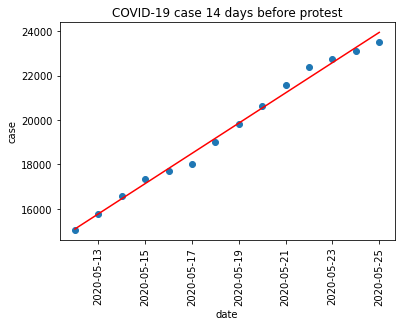

In [374]:
x_axis = range(0, len(floyd_bf['positive'].tolist()))
y_axis = floyd_bf['positive'].tolist()

reg = np.polyfit(x = x_axis, y = y_axis, deg = 1)
ry = np.poly1d(reg)
yvals_bf = ry (x_axis)
print("regression before protest is :", ry)

plt.title("COVID-19 case 14 days before protest")
plt.xlabel("date")
plt.ylabel("case")
plt.xticks(rotation = 'vertical')
plt.scatter(floyd_bf['date'], y_axis)
plt.plot(floyd_bf['date'],yvals_bf,color='red')



regression after protest is :  
369.4 x + 2.512e+04


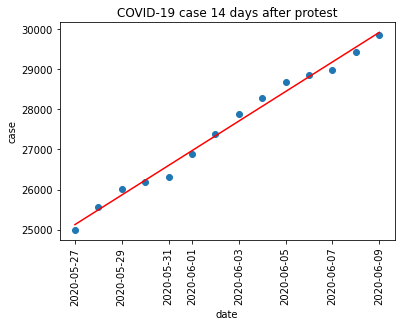

In [375]:
x_axis = range(0, len(floyd_af['positive'].tolist()))
y_axis = floyd_af['positive'].tolist()

reg = np.polyfit(x = x_axis, y = y_axis, deg = 1)
ry = np.poly1d(reg)
yvals_bf = ry (x_axis)
print("regression after protest is :", ry)

plt.title("COVID-19 case 14 days after protest")
plt.xlabel("date")
plt.ylabel("case")
plt.xticks(rotation = 'vertical')
plt.scatter(floyd_af['date'], y_axis)
plt.plot(floyd_af['date'],yvals_bf,color='red')



In [376]:
#The George Floyd protest started on May 26th 

MNcase.sort_values(by=['date'], inplace=True)
floyd_afr = MNcase.loc[MNcase['date'] >= datetime.datetime(2020,5,25)]
floyd_afr = floyd_afr.loc[MNcase['date'] <= (datetime.datetime(2020,5,26)+datetime.timedelta(days=14))]

floyd_bfr = MNcase.loc[MNcase['date'] < datetime.datetime(2020,5,25)]
floyd_bfr = floyd_bfr.loc[MNcase['date'] >= (datetime.datetime(2020,5,25)-datetime.timedelta(days=15))]


In [377]:
floyd_afr

,date,state,positive,negative,totalTestResultsSource,totalTestResults,recovered,dataQualityGrade,death,hospitalized,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease,month
10945,2020-05-25,MN,23524.0,207816.0,totalTestEncountersViral,231340.0,14816.0,A,890.0,2676.0,403,6250,231340,6653,12,88,05
10889,2020-05-26,MN,24308.0,213974.0,totalTestEncountersViral,238282.0,15523.0,A,908.0,2709.0,784,6158,238282,6942,18,33,05
10833,2020-05-27,MN,24988.0,222821.0,totalTestEncountersViral,247809.0,16314.0,A,942.0,2796.0,680,8847,247809,9527,34,87,05
10777,2020-05-28,MN,25559.0,232195.0,totalTestEncountersViral,257754.0,16655.0,A,977.0,2880.0,571,9374,257754,9945,35,84,05
10721,2020-05-29,MN,26013.0,242124.0,totalTestEncountersViral,268137.0,16930.0,A,1006.0,2936.0,454,9929,268137,10383,29,56,05
10665,2020-05-30,MN,26181.0,250392.0,totalTestEncountersViral,276573.0,17864.0,A,1036.0,3011.0,168,8268,276573,8436,30,75,05
10609,2020-05-31,MN,26322.0,257133.0,totalTestEncountersViral,283455.0,18695.0,A,1050.0,3047.0,141,6741,283455,6882,14,36,05
10553,2020-06-01,MN,26897.0,260739.0,totalTestEncountersViral,287636.0,19441.0,A,1060.0,3086.0,575,3606,287636,4181,10,39,06
10497,2020-06-02,MN,27376.0,267931.0,totalTestEncountersViral,295307.0,20381.0,A,1082.0,3134.0,479,7192,295307,7671,22,48,06
10441,2020-06-03,MN,27889.0,283319.0,totalTestEncountersViral,311208.0,21169.0,A,1097.0,3203.0,513,15388,311208,15901,15,69,06


In [378]:
# floyd_temp = MNcase.loc[MNcase['date'] < datetime.datetime(2020,6,15)]
# floyd_temp = floyd_temp.loc[MNcase['date'] >= datetime.datetime(2020,5,20)]
# floyd_temp

In [379]:
# plt.scatter(floyd_temp['date'], floyd_temp['positiveIncrease'])
# plt.xticks(rotation = 'vertical')

In [380]:
# md_temp = MDcase.loc[MDcase['date'] < datetime.datetime(2020,5,1)]
# md_temp = md_temp.loc[MDcase['date'] >= datetime.datetime(2020,4,1)]
# md_temp